# Лабораторная работа №5 <a id='intro'></a>

Первая часть:
- [Предварительная обработка](#1)
    - [Импорт данных](#1_1)
    - [Проверка данных](#1_2)
    - [Преобразование типов данных](#1_3)
- [Поиск пересекающихся пользователей](#2)
- [Создание пар дата-группа](#3)
- [Агрегирование по заказам](#4)
- [Агрегирование по посетителям](#5)
- [Объединение данных](#6)
- [Задание по вариантам](#7)
- [Выводы по первой части](#sum1)

Вторая часть:
- [Предварительная обработка](#8)
    - [Импорт данных](#8_1)
    - [Проверка данных](#8_2)
    - [Преобразование типов данных](#8_3)
- [Вывод частот событий](#9)
- [Вывод количества пользователей](#10)
- [Количество пользователей по группам](#11)
- [Поиск пересекающихся пользователей](#12)
- [Проведение тестирований](#13)
- [Выводы по второй части](#sum2)

Доп задание:
- [Дополнительное задание](#extra)



# Первая часть

## Предварительная обработка данных <a id='1'></a>
Проведём осмотр данных на предмет ошибок.

### Импортирование данных <a id='1_1'></a>

Для начала, необходимо импортировать библиотеку **Pandas** в Python и загрузить в датафрейм из CSV-файла:

In [40]:
import pandas as pd

read_csv = pd.read_csv('orders.csv', sep=',')
orders = pd.DataFrame(read_csv)
read_csv = pd.read_csv('visitors.csv', sep=',')
visitors = pd.DataFrame(read_csv)

Также, при помощи импорта библиотеки "`warnings`" уберём все предупреждения, которые точно появятся при дальнейшей работе.

In [41]:
import warnings

warnings.filterwarnings('ignore')

### Проверка файлов <a id='1_2'></a>

Проведём проверку наборов данных.

В данной части работы необходимо проверить данные на наличие пропусков, дубликатов и других аномалий (например в названии столбцов).

Первым делом, проверим правильность написания названий столбцов. Сделаем это при помощи встроенной функции `.columns()` для обоих датасетов.

In [42]:
display(orders.columns)
display(visitors.columns)

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

Index(['date', 'group', 'visitors'], dtype='object')

Из полученного ответа видно, что названия всех столбцов обоих наборов данных написаны правильно, следовательно, можно приступать к следующей проверки.

Далее, проверим датасеты на наличие пропуска в них, или же *пустых значений*. Данное действие производиться при помощи специального метода `.isna()`, который ищет все пропуски в таблице. А вместе с ним используют метод `.sum()`, который просуммирует и выведет количество пустых значений в таблице.

In [43]:
print(f'Количество пустых значений в датасете orders: \n{orders.isna().sum()}')
print(f'Количество пустых значений в датасете visitors: \n{visitors.isna().sum()}')

Количество пустых значений в датасете orders: 
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Количество пустых значений в датасете visitors: 
date        0
group       0
visitors    0
dtype: int64


Из вышеприведённого вывода видно, что в исходном датасете проверка на пропуски показала их *полное отсутствие*, что очень хорошо и можно приступать к последней проверке.

И в качестве последней проверки будет поиск дубликатов в исходных датасетах. Поиск дубликатов обычно делиться на 2 типа: *поиск явных дубликатов* и *поиск неявных дубликатов*. Начнем с первого случая.

Для поиска явных дубликатов используется функция "`.duplicated()`", которая просто ищет дубликаты. По умолчанию данный метод признает дубликатами те строки, которые полностью повторяют уже встречавшиеся в датасете. 
Т.е. метод, как и в случае с методом "`.isna()`", выводит значения либо **True**, либо **False**. Поэтому для понимания количества дубликатов добавляют, как и в предыдущем случая, функцию "`.sum()`".

In [44]:
print(f'Количество явных дубликатов в датасете orders: {orders.duplicated().sum()}')
print(f'Количество явных дубликатов в датасете visitors: {visitors.duplicated().sum()}')

Количество явных дубликатов в датасете orders: 0
Количество явных дубликатов в датасете visitors: 0


Получается, что **полностью повторяющихся строк в данном датасете нету**, что хорошо.

Теперь займемся поиском неявных дубликатов. Для этого используют метод "`.unique()`" для каждого столбца датасета. И чтобы вручную не писать этот метод для каждого столбца, гораздо проще будет создать цикл, который будет проходить по массиву, созданному по всем названиям столбцов.

Сперва, запустим данный цикл для первого датасета.

In [45]:
col = orders.columns
for column in col:
    print(orders[column].unique())

[3667963787 2804400009 2961555356 ... 1807773912 1947021204 3936777065]
[3312258926 3642806036 4069496402 ...  370388673  573423106 2108080724]
['2019-08-15' '2019-08-16' '2019-08-01' '2019-08-22' '2019-08-17'
 '2019-08-23' '2019-08-02' '2019-08-18' '2019-08-24' '2019-08-03'
 '2019-08-25' '2019-08-28' '2019-08-19' '2019-08-06' '2019-08-26'
 '2019-08-29' '2019-08-04' '2019-08-20' '2019-08-09' '2019-08-07'
 '2019-08-30' '2019-08-05' '2019-08-27' '2019-08-21' '2019-08-08'
 '2019-08-10' '2019-08-31' '2019-08-11' '2019-08-12' '2019-08-13'
 '2019-08-14']
[   1650     730     400    9759    2308    2210    1860    1044   13710
    1855    4008    4499    7370   11985   10980   15277    1060     990
   16490    1190     300    1050     632   15185    7555    3488    7620
    5280     700     190     383    1680   22785    2355    2470    6250
   19260     610    2986    1090    9290    2480    3000    2140    3590
    6990    1250    2970   18100     100    2750     570    2978    1440
    786

В ходе поиска неявных дубликатов обычно ищут:
- альтернативные варианты написания одного и того же значения;
- ошибочные написания.

И как видно из выводимого сообщения выше, в данном датасете **отсутствуют неявные дубликаты**.

И подводя итог, можно сделать вывод о том, что **в данном датасете нету никаких дубликатов**, ни явных, ни неявных.

И теперь, запустим тот же цикл, но для второго набора данных.

In [46]:
col = visitors.columns
for column in col:
    print(visitors[column].unique())

['2019-08-01' '2019-08-02' '2019-08-03' '2019-08-04' '2019-08-05'
 '2019-08-06' '2019-08-07' '2019-08-08' '2019-08-09' '2019-08-10'
 '2019-08-11' '2019-08-12' '2019-08-13' '2019-08-14' '2019-08-15'
 '2019-08-16' '2019-08-17' '2019-08-18' '2019-08-19' '2019-08-20'
 '2019-08-21' '2019-08-22' '2019-08-23' '2019-08-24' '2019-08-25'
 '2019-08-26' '2019-08-27' '2019-08-28' '2019-08-29' '2019-08-30'
 '2019-08-31']
['A' 'B']
[719 619 507 717 756 667 644 610 617 406 718 595 748 735 628 361 412 668
 502 575 646 609 468 395 621 722 711 594 577 490 699 713 581 509 770 707
 655 709 654 369 721 543 769 746 544 413 421 737 487 560 656 650 546 378
 679 676 720 531]


И тут, как и в предыдущем случае, отсутствуют неявные дубликаты.

Из проведённых действий можно сделать вывод о том, что в исходных наборах данных отсутствуют какие-либо ошибки в данных. Следовательно, исходные наборы данных можно считать прекрасными.

### Преобразование типов <a id='1_3'></a>

Преобразуем данные к нужному формату данных.

Для оценки правильности форматов данных необходимо вывести некоторое количество данных из датасета, например первые **10** строк, а затем при помощи метода `.info()` узнать их тип данных. Даннуб операцию необходимо проделать для обоих наборов данных.

Сперва, сделаем данные действия для датасета `orders`:

In [47]:
display(orders.head(10))
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Проведя сравнение полученных результатов, можно сделать вывод о том, что столбец `date` должен иметь временной тип данных, а не текстовый. Превращение в необходимый тип данных происходит при помощи метода `to_datetime()`. Для создания определённого формата строки использую целый набор специальных параметров:
- %d - номер дня;
- %m - номер месяца;
- %Y - номер года;
- ' ' - разделитель даты и времени
- %H - часы в 24-часовом формате;
- %M - минуты;
- %S - секунды.

В данном датасете формат даты выглядит следующим образом: `'Y-%m-%d'`.

Учитывая все это, изменим тип данных по данному образцу.

In [48]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

И проверим получившийся результат воспользовавшись функцией `'.info()'`.

In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Теперь, проделываем точно такой же алгоритм работы и для второго датасета `visitors`.

In [50]:
display(visitors.head(10))
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В данном датасете, точно также как и в предыдущем, столбец `date` имеет неправильный тип данных. Превращение в необходимый тип данных происходит при помощи метода `to_datetime()`, а формат даты выглядит следующим образом: `'Y-%m-%d'`.

In [51]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

И проверим получившийся результат воспользовавшись функцией `'.info()'`.

In [52]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Таким образом, в ходе выполнения данного этапа были приведены к верному формату данных 2 столбца по одному на каждый датасет. 

[Вернуться в начало](#intro)

## Поиск пересекающихся пользователей <a id='2'></a>

Посмотрим, если ли пересекающиеся пользователи

Данная часть работы выполняется только для первого датасета, а именно для `orders`, поскольку в нём существуют 2 столбца, показывающие **идентификаторы заказа** и **пользователя**. Поиск и проверка пересекающихся пользователей будет производиться следующим образом:
- Сперва, *создадим массив* уникальных идентификаторов пользователей из исходого набора данных;
- Затем узнаем *длину данного массива* (по идеи если все пользователи в датасете уникальны, то длина должна быть равна размеру датасета);
- Если длина массива окажется меньше, чем исходный датасет, то при помощи функции `drop_duplicates(subset='столбец')` *удалим дубликаты* по выбранному столбцу;
- *Сравним длину* получившегося датафрейма с длиной уникальных идентификаторов пользователей.

In [53]:
len(orders['visitorId'].unique())

1031

Как видно из вышеполученного ответа, количество уникальных пользователей в датасете оказалось меньше, чем общее количество строк в нём. Следовательно, необходимо удалить повторяющиеся **ID пользователей** при помощи функции `drop_duplicates(subset='столбец')`, у которой в качестве параметра передадим название столбца, по которому будет проводиться удаление дубликатов:

In [54]:
orders = orders.drop_duplicates(subset=['visitorId'])
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


После удаления количество строк в итоговом датасете стало точно таким же, сколько и уникальных значений из столбца **visitorId**. Отсюда можно сделать вывод о том, что удаление прошло успешно и можно переходить к следующему пункту лабораторной работы.

[Вернуться в начало](#intro)

## Создание пар дата-тест <a id='3'></a>

Необходимо создать массив уникальных пар значений дат и групп теста.

В данной части работы необходимо создать массив, состоящий из уникальных пар даты и группы теста для набора данных `orders`. Данная процедура показана ниже:

In [55]:
datesGroups_orders = orders[['date', 'group']].drop_duplicates()
datesGroups_orders

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Таким образом, в ходе выполнения данной части удалось выделить уникальные пары даты и группы теста из набора данных `orders` и создать из них отдельный массив.

[Вернуться в начало](#intro)

## Агрегирование данных по дням о заказах <a id='4'></a>

Необходимо получить агрегированные кумулятивные данные по дням о заказах.

В данной части необходимо провести агрегацию кумулятивных данных по дням о заказах. Выполнение данного задание происходит при помощи нижеприведённого кода:

In [56]:
import numpy as np
transactionAggregated = datesGroups_orders.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}),axis=1).sort_values(by=['date','group'])
transactionAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,19,19,123110
66,2019-08-01,B,20,20,92747
175,2019-08-02,A,36,36,197605
173,2019-08-02,B,42,42,252040
291,2019-08-03,A,60,60,310078


[Вернуться в начало](#intro)

## Агрегирование данных по дням о посетителях <a id='5'></a>

Необходимо получить агрегированные кумулятивные данные по дням о посетителях.

В данной части необходимо провести агрегацию кумулятивных данных по дням о посетителях. Выполнение данного задание происходит при помощи нижеприведённого кода:

In [57]:
visitorsAggregated = datesGroups_orders.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}),axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


[Вернуться в начало](#intro)

## Объединение данных <a id='6'></a>

Необходимо объединить в одной данные в одной таблице.

В данной части работы необходимо объединить оба агрегированных массива в один датафрейм. Выполнение данной части показано ниже:

In [58]:
cumulativeData = pd.merge(transactionAggregated, visitorsAggregated)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,19,19,123110,719
1,2019-08-01,B,20,20,92747,713
2,2019-08-02,A,36,36,197605,1338
3,2019-08-02,B,42,42,252040,1294
4,2019-08-03,A,60,60,310078,1845
...,...,...,...,...,...,...
57,2019-08-29,B,517,517,4907421,17708
58,2019-08-30,A,467,467,3498021,18037
59,2019-08-30,B,538,538,5116644,18198
60,2019-08-31,A,475,475,3551264,18736


[Вернуться в начало](#intro)

## Задание по вариантам <a id='7'></a>

Необходимо выполнить задание по вариантам.

В данной части необходимо в начале разделить созданный набор данных `cumulativeData` по группа А и В на датасеты: `cumulativeRevenueA` и `cumulativeRevenueB`, а затем выполнить задание по вариантам.

Выбранное задание по варианту выглядит следующим образом: Требуется изобразить график конверсии по группам А и В. По оси **Х** - **date**, по оси **Y** - **конверсия**.

*Примечание*: для подсчета конверсии используется следующее выражение `cumulativeData['orders']` / `cumulativeData['visitors']`.

Для начала необходимо разбить данные на 2 датасета, как это и показано ниже:

In [59]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B']

conversiaA = cumulativeRevenueA['orders']/cumulativeRevenueA['visitors']
conversiaB = cumulativeRevenueB['orders']/cumulativeRevenueB['visitors']

И теперь необходимо постоить график, как это показано ниже:

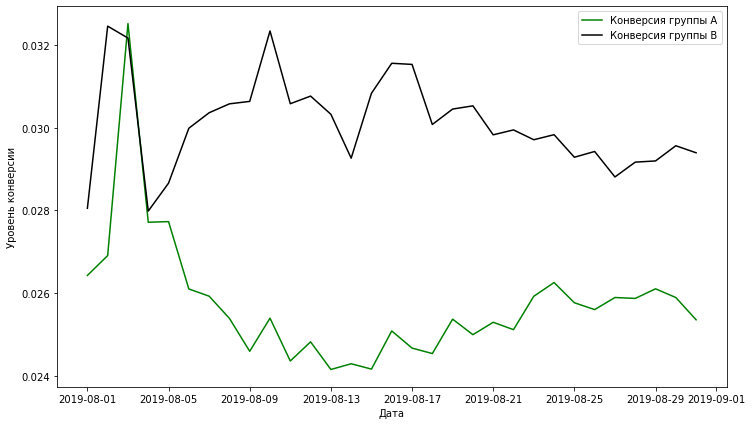

In [152]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], conversiaA, color='green', label='Конверсия группы А')
plt.plot(cumulativeRevenueB['date'], conversiaB, color='black', label='Конверсия группы В')
plt.ylabel('Уровень конверсии')
plt.xlabel('Дата')
plt.legend()

Если обращаться к определению, то **конверсия** - это процесс, при котором посетитель сайта совершает желаемое разработчиком действие. И в зависимости от целей сайта это может быть: покупка товара (как в данном случае), регистрация на мероприятие, загрузка приложения, подписка на курс или любое другое действие, которое превращает посетителя в потенциального клиента.

И если делать вывод по данному графику, то можно заметить, что конверсия для **второй группы** с течением времени **увеличивается**, то есть увеличивается процент пользователей, совершивших покупку. Однако, для **первой группы** конверсия со временем только **уменьшается**, что означает уменьшение процента пользователей, которые совершают покупки на сайте.

[Вернуться в начало](#intro)

## Выводы <a id='sum1'></a>

В ходе выполнения данной лабораторной работы я улучшил свои навыки работы с Jupiter-блокнотами. Вновь осуществил предварительную обработку данных, а также вспомнил этапы работы с библиотекой **Pandas**.

Работы проводились по двум датасетам: `orders` и `visitors`.            
На этапе **предварительной обработки** в данных датасетах не было обнаружено ни одного изъяна, за исключением типа данных столбца `date` как в одном датасете, так и в другом. Далее, на этапе **поиска повторяющихся пользователей** был разработан и успешно применён алгоритм поиска и устранения повторяющихся пользователей из датасета. Таким образом, после удаления повторяющихся пользователей количество записей в датасете стало **1031**, хотя изначально было **1197**. Затем, на этапе **создание пар данных** был создан массив уникальных групп по данным дата - тест, который в дальнейшем был применён. После этого, на этапах **агрегирование данных** были получены агрегированные кумулятивные данные по дням о заказах и о посетителях, а после этого, на этапе **объединение данных**, все агрегированные данные были объеденены в один датафрейм. После этого, в качестве задания по варианту было предложено сделать 2 графика конверсии по двум группам. Исходя из полученных графиков был сделан вывод о том, что коверсия для **второй группы** с течением времени **увеличивается**, а для **первой группы** - **уменьшается**.

[Вернуться в начало](#intro)

# Вторая часть

## Предварительная обработка данных <a id='8'></a>

Проведём осмотр данных на предмет ошибок.

###  Импортирование данных <a id='8_1'></a>

Для начала, необходимо загрузить в датафрейм из CSV-файла:

In [61]:
read_csv = pd.read_csv('logs_exp.csv', sep='\t')
df = pd.DataFrame(read_csv)

### Проверка файла <a id='8_2'></a>

Проведём обработку данных.

В данной части работы необходимо проверить данные на наличие пропусков, дубликатов и других аномалий (например в названии столбцов).

Первым делом, проверим правильность написания названий столбцов. Сделаем это при помощи встроенной функции `.columns()` для обоих датасетов.

In [62]:
df.columns

Index(['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId'], dtype='object')

Исходя из вышеполученного списка видно, что все столбцы начинаются с заглавной буквы, что не есть хорошо. Поэтому изменим названия всех столбцов необходимым образом при помощи метода "`.rename()`", которая используется для всего датафрейма. И в качестве параметров передаются названия столбцов, которые необходимо изменить:

In [63]:
df = df.rename(columns={'EventName':'eventName', 'DeviceIDHash': 'deviceIDHash', 'EventTimestamp': 'eventTimestamp', 'ExpId': 'expId'})

Далее, проверим датасеты на наличие пропуска в них, или же *пустых значений*. Данное действие производиться при помощи специального метода `.isna()`, который ищет все пропуски в таблице. А вместе с ним используют метод `.sum()`, который просуммирует и выведет количество пустых значений в таблице.

In [64]:
print(f'Количество пустых значений в датасете orders: \n{df.isna().sum()}')

Количество пустых значений в датасете orders: 
eventName         0
deviceIDHash      0
eventTimestamp    0
expId             0
dtype: int64


Из вышеприведённого вывода видно, что в исходном датасете проверка на пропуски показала их *полное отсутствие*, что очень хорошо и можно приступать к последней проверке.

И в качестве последней проверки будет поиск дубликатов в исходных датасетах. Поиск дубликатов обычно делиться на 2 типа: *поиск явных дубликатов* и *поиск неявных дубликатов*. Начнем с первого случая.

Для поиска явных дубликатов используется функция "`.duplicated()`", которая просто ищет дубликаты. По умолчанию данный метод признает дубликатами те строки, которые полностью повторяют уже встречавшиеся в датасете. 
Т.е. метод, как и в случае с методом "`.isna()`", выводит значения либо **True**, либо **False**. Поэтому для понимания количества дубликатов добавляют, как и в предыдущем случая, функцию "`.sum()`".

In [65]:
print(f'Количество явных дубликатов в датасете: {df.duplicated().sum()}')

Количество явных дубликатов в датасете: 413


Поскольку были обнаружены явные дубликаты, то удалим их при помощи функции `.drop_duplicates()`:

In [66]:
df.drop_duplicates()

,eventName,deviceIDHash,eventTimestamp,expId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


Теперь займемся поиском неявных дубликатов. Для этого используют метод "`.unique()`" для каждого столбца датасета. И чтобы вручную не писать этот метод для каждого столбца, гораздо проще будет создать цикл, который будет проходить по массиву, созданному по всем названиям столбцов.

Сперва, запустим данный цикл для первого датасета.

In [67]:
col = df.columns
for column in col:
    print(df[column].unique())

['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']
[4575588528974610257 7416695313311560658 3518123091307005509 ...
 6660805781687343085 7823752606740475984 3454683894921357834]
[1564029816 1564053102 1564054127 ... 1565212483 1565212498 1565212517]
[246 248 247]


В ходе поиска неявных дубликатов обычно ищут:
- альтернативные варианты написания одного и того же значения;
- ошибочные написания.

И как видно из выводимого сообщения выше, в данном датасете **отсутствуют неявные дубликаты**.

И подводя итог, можно сделать вывод о том, что **в данном датасете нету никаких дубликатов**, ни явных, ни неявных.

### Преобразование типов столбцов <a id='8_3'></a>

Преобразуем данные к нужному формату данных.

Для оценки правильности форматов данных необходимо вывести некоторое количество данных из датасета, например первые **10** строк, а затем при помощи метода `.info()` узнать их тип данных. Даннуб операцию необходимо проделать для обоих наборов данных.

In [68]:
display(df.head(10))
df.info()

,eventName,deviceIDHash,eventTimestamp,expId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   eventName       244126 non-null  object
 1   deviceIDHash    244126 non-null  int64 
 2   eventTimestamp  244126 non-null  int64 
 3   expId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Исходя из полученного сообщения, можно сделать вывод о том, что все столбцы имеют верный тип данных.

## Вывод частот событий <a id='9'></a>

В данной части работы необходимо вывести на экран количество каждого события в порядке убывания частоты. Также, необходимо ответить на вопрос: "*Какое событие встречается чаще всего*". 

Подсчет количества событий происходит при помощи функции `.value_count()`, которая считает количество значений каждого элемента из столбца и выводит списком в порядке убывания.

In [69]:
df['eventName'].value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: eventName, dtype: int64

Таким образом, отвечая на поставленный вопрос, можно сказать, что первенство среди всех событий вполне логично занимает событие `MainScreenAppear`, которое означает количество раз появления главного экрана у пользователя.

[Вернуться в начало](#intro)

## Вывод количества пользователей <a id='10'></a>

Необходимо подсчитать, сколько пользователей совершали каждое из возможных событий, используя методы `groupby` и `agg({'user_id', 'nunique'})`.

In [70]:
group = df.groupby(['eventName']).agg({'deviceIDHash':'nunique'})
group.sort_values(by='deviceIDHash', ascending=False)

,deviceIDHash
eventName,
MainScreenAppear,7439
OffersScreenAppear,4613
CartScreenAppear,3749
PaymentScreenSuccessful,3547
Tutorial,847


Получается, что общее количество пользователей, которые совершали событие `MainScreenAppear` равняется **7439**.

[Вернуться в начало](#intro)

## Количество пользователей по группам <a id='11'></a>

Требуется определить количество пользователей в каждой группе (246, 247, 248). Подсчет количества пользователей будет происходит точно также, как и в случае с определнием количества каждого события, а именно при помощи функции `.value_count()`.

In [71]:
df['expId'].value_counts()

248    85747
246    80304
247    78075
Name: expId, dtype: int64

Таким образом, делая вывод по данной части работы, первая группа является самой большой среди всех.

[Вернуться в начало](#intro)

## Поиск пересекающихся пользователей <a id='12'></a>

Необходимо найти пользователей, которые пересекаются, т.е. присутствуют в двух или более группах.

Поиск и проверка пересекающихся пользователей будет производиться следующим образом:
- Сперва, *создадим массив* уникальных идентификаторов пользователей из исходого набора данных;
- Затем узнаем *длину данного массива* (по идеи если все пользователи в датасете уникальны, то длина должна быть равна размеру датасета);
- Если длина массива окажется меньше, чем исходный датасет, то при помощи функции `drop_duplicates(subset='столбец')` *удалим дубликаты* по выбранному столбцу;
- *Сравним длину* получившегося датафрейма с длиной уникальных идентификаторов пользователей.

In [72]:
len(df['deviceIDHash'].unique())

7551

Как видно из вышеполученного ответа, количество уникальных пользователей в датасете оказалось меньше, чем общее количество строк в нём. Следовательно, необходимо удалить повторяющиеся **ID пользователей** при помощи функции `drop_duplicates(subset='столбец')`, у которой в качестве параметра передадим название столбца, по которому будет проводиться удаление дубликатов:

In [73]:
df = df.drop_duplicates(subset=['deviceIDHash'])
df

,eventName,deviceIDHash,eventTimestamp,expId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
...,...,...,...,...
243339,MainScreenAppear,5811573131275421338,1565208834,248
243542,Tutorial,5365227480683749189,1565209432,248
243777,MainScreenAppear,6660805781687343085,1565210322,246
243820,MainScreenAppear,7823752606740475984,1565210478,246


После удаления количество строк в итоговом датасете стало точно таким же, сколько и уникальных значений из столбца **deviceIDHash**. Отсюда можно сделать вывод о том, что удаление прошло успешно и можно переходить к следующему пункту лабораторной работы.

[Вернуться в начало](#intro)

## Проведение А/А и А/В тестирование <a id='13'></a>

В данной части необходимо провести тестирования и на основе результатов тестирования отвегнуть или принять нулевую гипотезу.

*Нулевая гипотеза*: Группа 246 и 247 не имеет различий.         
*Альтернативная гипотеза*: Группа 246 и 247 отличаются.

Тестирование будет происходиться при помощи функции, написанной ниже:

In [74]:
import math as mth
import scipy.stats as stats
def test_groups(group_a, group_b, event, alpha):
    #получим количество успехов
    group_users = np.array([df.query('eventName == @event and expId == @group_a').deviceIDHash.nunique(),

    df.query('eventName == @event and expId == @group_b').deviceIDHash.nunique()])
    #получим количество пользователей в группах
    total_users = np.array([df.query('expId == @group_a').deviceIDHash.nunique(),
    df.query('expId == @group_b').deviceIDHash.nunique()])
    # пропорция успехов в первой группе:
    p1 = group_users[0]/total_users[0]
    # пропорция успехов во второй группе:
    p2 = group_users[1]/total_users[1]
    # пропорция успехов в комбинированном датасете:
    p_combined = (group_users[0] + group_users[1]) / (total_users[0] + total_users[1])
    # разница пропорций в датасетах
    difference = p1 - p2
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(  p_combined * (1 - p_combined) * (1 / total_users[0] + 1 / total_users[1])  )
    #  задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = stats.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: есть значимая разница между долями')
    else:
        print(  'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

events = df['eventName'].unique()

print('Тестирование A/A:\n')
for i in events:
    print(f'Для события {i}: ')
    test_groups(246, 247, i, 0.75)
    print()

print('Тестирование A/B:\n')
for i in events:
    print(f'Для события {i}: ')
    test_groups(246, 248, i, 0.75)
    print()

Тестирование A/A:

Для события MainScreenAppear: 
p-значение:  0.591608171820533
Отвергаем нулевую гипотезу: есть значимая разница между долями

Для события PaymentScreenSuccessful: 
p-значение:  0.22148595908717583
Отвергаем нулевую гипотезу: есть значимая разница между долями

Для события OffersScreenAppear: 
p-значение:  0.11153251856801516
Отвергаем нулевую гипотезу: есть значимая разница между долями

Для события CartScreenAppear: 
p-значение:  0.6049949831127166
Отвергаем нулевую гипотезу: есть значимая разница между долями

Для события Tutorial: 
p-значение:  0.7215655772844491
Отвергаем нулевую гипотезу: есть значимая разница между долями

Тестирование A/B:

Для события MainScreenAppear: 
p-значение:  0.8906977057716843
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события PaymentScreenSuccessful: 
p-значение:  0.8788232794860782
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события OffersScreenAppear: 
p

Далее, запускаем данную функцию следующим образом: `test_group(group1, group2, eventName, alpha)`; где **group1** и **group2** - название групп, **eventName** - название события, **alpha** - уровень статистической значимости.

Запустим данную функцию для групп `246` и `247`, для всех событий и уровень значимости выставим `0.75`. Полученные результаты говорят о том, что в **5** из 5 случаев необходимо отвергнуть нулевую гипотезу, поскольку уровень статистической значимости оказывался больше, чем получавшийся уровень. Следовательно, необходимо принять альтернативную гипотезу, гласящую что: **Группы 246 и 247 отличаются**.

И наконец, запустим данную функцию для А/В тестирования и на основе результатов выбрать верную гипотезу:

*Нулевая гипотеза*: Нет различий между группой А(246) и группой В(248).         
*Альтернативная гипотеза*: Есть различия между контрольной группой(246) и экспериментальной группами(248).

Запустим данную функцию для групп `246` и `248`, для все событий и выставим уровен статистической значимости `0.75`. Полученный результаты говорят о том, что в **2** из 5 случаев необходимо отвегнуть нулевую гипотезу, поскольку уровень статистической значимости оказывался больше, чем получавшийся уровень. Следовательно, необходимо принять нулевую гипотезу, гласящую что: **Нет различий между группой А(246) и группой В(248)**.

[Вернуться в начало](#intro)

## Выводы <a id='sum2'></a>

В ходе выполнения данной лабораторной работы я улучшил свои навыки работы с Jupiter-блокнотами. Вновь осуществил предварительную обработку данных, а также вспомнил этапы работы с библиотекой **Pandas**.

На этапе **предварительной обработки** были проделаны следующие действия: изменены названия столбцов и удалены явные дубликаты, коих было **413** штук. Далее, на этапе **вывод частот событий** был выведен список, показывающий количество раз выполнения каждого действия у пользователей в порядке убывания. И на первом месте стало событие `MainScreenAppear`, которое означает количество раз появления главного экрана у пользователя. После этого, на этапе **вывод количества пользователей** было получено количество уникальных пользователей, которые выполняли одно из действий. И было получено, что событие `MainScreenAppear` попрежнему оставалось на первом месте, однако значение у данного события уменьшилось на 2 порядка. Далее, на этапе **количество пользователей по группам** было получено количество пользователей, принадлежащий одной из трёх групп. И в качестве результата было получено, что группа 248 являлась самой большой среди всех. После этого, на этапе **поиска пересекающихся пользователей** было получено, что уникальных пользователей всего **7551**, хотя изначально в датасете существовало **244 127** значений. И наконец, на этапе **проведения тестирования** были проведены 2 серии тестов: *первая* была направлена на принятия (или отклонения) гипотезы о различии групп 246 и 247, а *вторая* - на различие между 246 и 248 группами. По итогу получилось, что группы 246 и 247 различаются, а группы 246 и 248 схожи.

# Дополнительное задание <a id='extra'></a>

В качестве дополнительного задания было предложено посчитать процент пользователей, совершавших конкретные события. Процент пользователей считается как **уникальные пользователи совершившие определённое действие** разделить на **общее количество уникальных пользователей**. Также, необходимо посчитать процент пользователей, которые отваливались на каждом последующем действии. 

В начале, необходимо было понять общее количество уникальных пользователей, которые заходили на сайт. Данное действие выполняется при помощи вычисления длинны массива уникальных значений из столбца `deviceIDHash`. Далее, из полученной ранее группы (которая была получена на этапе **вычисление количества пользователей**) необходимо удалить строку `Tutorial`, поскольку она никоим образом не учавствует в конверсии пользователей. Данные действия выполнены ниже:

In [149]:
extra = group.sort_values(by='deviceIDHash', ascending=False)
extra = extra.drop(index='Tutorial')
display(extra)
unique_users = len(df['deviceIDHash'].unique())
print(f'Общее количество уникальных пользователей в тестировании: {unique_users}')

,deviceIDHash
eventName,
MainScreenAppear,7439
OffersScreenAppear,4613
CartScreenAppear,3749
PaymentScreenSuccessful,3547


Общее количество уникальных пользователей в тестировании: 7551


Затем, необходимо добавить новый столбец `percentage`, в котором будут записаны количество пользователей в процентах, которые выполнили какое-то действие. Данный этап показан ниже:

In [150]:
extra['percentage'] = round(extra.deviceIDHash/unique_users, 3)
display(extra)

,deviceIDHash,percentage
eventName,,
MainScreenAppear,7439,0.985
OffersScreenAppear,4613,0.611
CartScreenAppear,3749,0.496
PaymentScreenSuccessful,3547,0.470


И наконец, необходимо посчитать разницу (в процентах) между количеством пользователей, которые выполнили предыдущее действие, с количеством пользователей, которые выполнили текущее действие. Код выполнения данной части представлен ниже:

In [151]:
perc = extra['percentage']
for i in range(0, len(perc)-1):
    print(f'Разница между {i} и {i+1} действием равняется: {perc[i] - perc[i+1]}')

Разница между 0 и 1 действием равняется: 0.374
Разница между 1 и 2 действием равняется: 0.11499999999999999
Разница между 2 и 3 действием равняется: 0.026000000000000023


Исходя из проделанной работы, сделанной в дополнительном задании, можно сделать несколько выводов:
1) Не все 100% пользователей выполнили самое первое действие, а именно `MainScreenAppear`, что удивительно;
2) Самый большой скачек в разнице количества людей совершивших действия - это между первым и вторым действием;
3) Всего около 47% пользователей завершают последнее действие при покупке товара, что является достаточно низким показателем.